# Python for Data Analysis project - Vincent DEBANDE and Ludovic CHEVALLIER - DIA2 ESILV

This dataset includes data for the estimation of obesity levels in individuals from the countries of **Mexico, Peru and Colombia**, based on their **eating habits and physical condition**. 

The data contains 17 attributes and 2111 records, the records are labeled with the **class variable NObesity (Obesity Level)**, that allows *classification* of the data using the values of *Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III*. 

77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Loading the data

In [1]:
!pip install pandas
!pip install seaborn
!pip install dython
!pip install gower
!pip install scipy

You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\vincent\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from cycler import cycler

import gower 
from scipy.spatial import distance

In [3]:
obesity = pd.read_csv('DB/ObesityDataSet_raw_and_data_sinthetic.csv',error_bad_lines=False )
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Analysis of the attributes

This dataset include data for the **estimation of obesity** levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

Here are the attributes of the dataset :


- Gender : Male/Female
- Age : Numeric value
- Height : Numeric value (Mt)
- Weight : Numeric value (Kg)
- family_history_with_overweight : boolean

- FAVC (Frequent consumption of high caloric food) : boolean
- FCVC (Frequency of consumption of vegetables) : Never | Sometimes | Always
- NCP: Number of main meals: Combien de repas ? : Between 1 and 2 | Three | More than 3
- CAEC: (Consumption of food between meals): No | Sometimes | Frequently | Always
- SMOKE (Do you smoke?) : boolean
- CH2O (Consumption of water daily) : Less than a liter, Between 1 and 2 L, More than 2 L
- SCC (Do you monitor the calories you eat daily?) : boolean
- FAF (Physical activity frequency) : NO | 1-2days | 2-4 days | 4-5 days
- TUE (Time using technology devices) : 0-2 hours | 3-5 hours | more than 5 hours
- CALC (Consumption of alcohol) : No | Sometimes | Frequently | Always
- MTRANS (Transportation used) : Automobile | Motrobike,Bike | Public Transportation | Walking

- NObeyesdad (Obesity Level : **target**) : Insufficient Weight | Normal Weight | Overweight Level I | Overweight Level II | Obesity Type I | Obesity Type II | Obesity Type III)

Note that the obesity level has been determined with the **BMI** (Body Mass Index) : 

- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40


First of all, we need to assign categories to our data. (For example, a indiviual with FCVC = 1.5 needs to be in the categorie 2)

Here is the meaning of the categories :

- x <= 1.0 -> **1**
- 1.0 < x <= 2.0 -> **2**
- 2.0 < x <= 3.0 -> **3**
- 3.0 < x -> **4**

We'll also round the age. 

In [5]:
def transfNumber(liste):
    listetransf=[]
    for i in range(len(liste)):
        if(liste[i]<=1.0):
            listetransf.append("1")
        elif((liste[i]>1) & (liste[i]<=2.0)):
            listetransf.append("2")
        elif((liste[i]>2) & (liste[i]<=3.0)):
            listetransf.append("3")
        else:
            listetransf.append("4")
    return listetransf

def tranFrequency(liste):
    listetransf=[]
    for i in range(len(liste)):
        if(liste[i]=="no"):
            listetransf.append("0")
        elif((liste[i]=="Sometimes")):
            listetransf.append("1")
        elif((liste[i]=="Frequently")):
            listetransf.append("2")
        else:
            listetransf.append("3")
    return listetransf

In [6]:
obesity["FCVC"]=transfNumber(obesity["FCVC"])
obesity["NCP"]=transfNumber(obesity["NCP"])
obesity["CH2O"]=transfNumber(obesity["CH2O"])
obesity["FAF"]=transfNumber(obesity["FAF"])
obesity["TUE"]=transfNumber(obesity["TUE"])

obesity['Age'] = round(obesity['Age']).astype(int)

obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,1,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,1,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III


### Data type

Let's see all the values of our features !

That's nice, all our features have multiple values. 

In [7]:
def structureData(df):
    for feature in df.columns:
        uniq = np.unique(obesity[feature])
        print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))
        
structureData(obesity)

Gender: 2 distinct values -  ['Female' 'Male']
Age: 40 distinct values -  [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 51 52 55 56 61]
Height: 1574 distinct values -  [1.45     1.456346 1.48     ... 1.947406 1.975663 1.98    ]
Weight: 1525 distinct values -  [ 39.        39.101805  39.371523 ... 160.935351 165.057269 173.      ]
family_history_with_overweight: 2 distinct values -  ['no' 'yes']
FAVC: 2 distinct values -  ['no' 'yes']
FCVC: 3 distinct values -  ['1' '2' '3']
NCP: 4 distinct values -  ['1' '2' '3' '4']
CAEC: 4 distinct values -  ['Always' 'Frequently' 'Sometimes' 'no']
SMOKE: 2 distinct values -  ['no' 'yes']
CH2O: 3 distinct values -  ['1' '2' '3']
SCC: 2 distinct values -  ['no' 'yes']
FAF: 3 distinct values -  ['1' '2' '3']
TUE: 2 distinct values -  ['1' '2']
CALC: 4 distinct values -  ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS: 5 distinct values -  ['Automobile' 'Bike' 'Motorbike' 'Public_Transportatio

# Data Analysis

Now that we have categories, we'll first plot the distribution of the NObesity attribute.
That can gives us some information. 

The plot tells us that the individuals have a pretty good repartition into the categories. If a categorie would have a lot more people, we could have search for an uncommon attribute or for something different. 

<AxesSubplot:title={'center':'Number of people by obesity level'}, xlabel='NObeyesdad'>

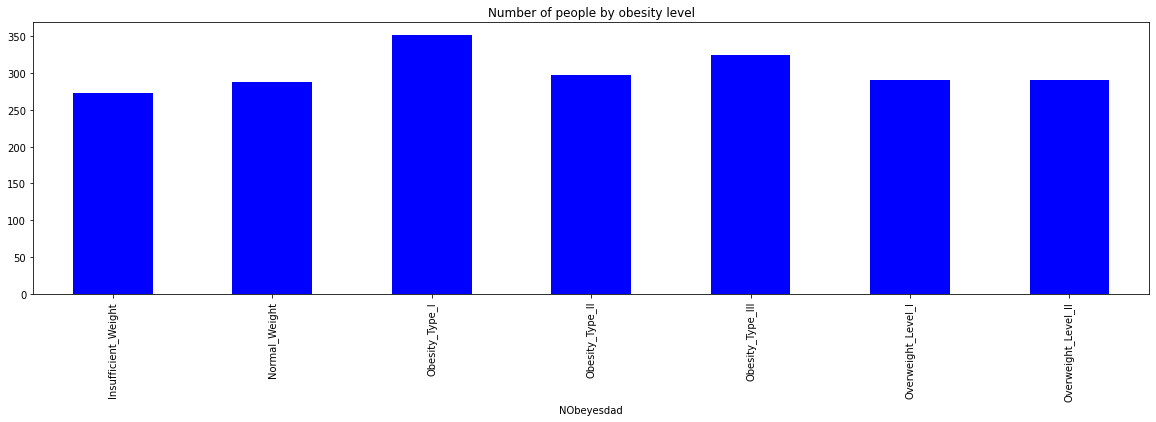

In [8]:
fig = plt.figure(1, figsize=(20, 5))
colored={"blue","red","green","black"}
obesity.groupby("NObeyesdad").Gender.count().plot(kind="bar",title="Number of people by obesity level",color="blue")

## Gender 

Here is a plot of the repartition male/female for every categorie of NObeyesdad. 
We can see that the repartition is pretty balanced for 3 categories. 

They are :

- More **male** suffering of *Overweight of level 2*. 
- More **female** suffering of *Insufficient weight*. 
- **Just male** suffering of ***Obesity type 2***.
- **Just female** suffering of ***Obesity type 3***.

To understand why is that, we should look deeply into the explanation of the dataset.

### Why is there a problem with Obesity type 2 and 3 ?

#### Hypothesis 

77% of the data was generated using the tool Weka and the filter SMOTE. The initial data could have contained only male with Obesity type 2 and only female with Obesity type 3, therefore Weka generated records like that.

#### Deeper analysis 

To be sure there is a problem, we need to isolate the records with Obesity level 2 and 3 and compare them. 
If there is only the gender changing, we can make the assumption that : 

- This type of obesity apply to only one gender (genetic issue) (female may be shorter, so they could have a higher BMI)
- There is a problem in our data
- Another reason we didn't think of

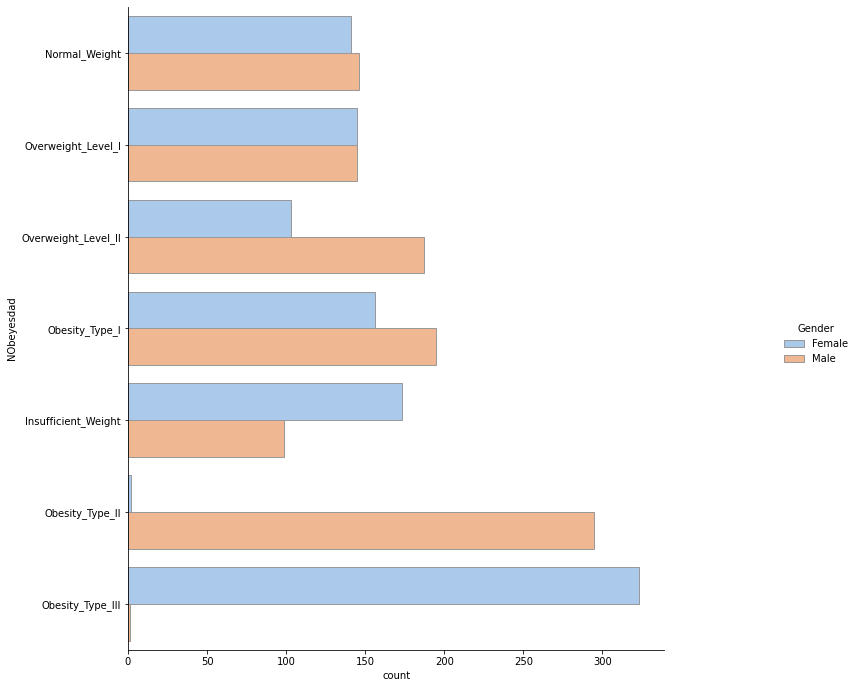

In [9]:
g = sns.catplot(y="NObeyesdad", hue="Gender", kind="count", 
            palette="pastel", edgecolor=".6",
            data=obesity)

g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### Deeper Analysis of gender repartition in Obesity Type II and III

In [10]:
OType2 = obesity[obesity['NObeyesdad'] == 'Obesity_Type_II']
OType3 = obesity[obesity['NObeyesdad'] == 'Obesity_Type_III']

OType2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
68,Male,30,1.760000,112.000000,yes,yes,1,3,no,yes,2,yes,1,1,Frequently,Automobile,Obesity_Type_II
90,Female,25,1.630000,93.000000,no,no,3,4,Always,no,1,no,2,1,no,Public_Transportation,Obesity_Type_II
165,Male,30,1.920000,130.000000,yes,no,2,3,Sometimes,yes,1,no,1,1,Sometimes,Public_Transportation,Obesity_Type_II
197,Male,41,1.750000,118.000000,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Bike,Obesity_Type_II
210,Male,20,1.800000,114.000000,yes,yes,2,3,Frequently,no,2,no,1,1,no,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Male,31,1.653876,102.583895,yes,yes,3,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Obesity_Type_II
1795,Male,20,1.657132,105.580491,yes,yes,3,2,Sometimes,no,2,no,1,2,no,Public_Transportation,Obesity_Type_II
1796,Male,21,1.644751,101.067988,yes,yes,3,2,Sometimes,no,2,no,1,1,no,Public_Transportation,Obesity_Type_II
1797,Male,26,1.660761,104.321463,yes,yes,3,2,Sometimes,no,2,no,1,2,no,Public_Transportation,Obesity_Type_II


In [11]:
OType3

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
202,Female,26,1.560000,102.000000,yes,yes,3,3,Sometimes,yes,1,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
344,Male,18,1.870000,173.000000,yes,yes,3,3,Frequently,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
403,Female,26,1.660000,112.000000,yes,no,3,3,Sometimes,no,3,no,1,1,no,Automobile,Obesity_Type_III
498,Female,25,1.686306,104.572712,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
499,Female,19,1.683124,126.673780,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
OType2.groupby('Gender').count()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Female,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Male,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295


In [13]:
OType3.groupby('Gender').count()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,,,,,,,,,,,,,,,,
Female,323,323,323,323,323,323,323,323,323,323,323,323,323,323,323,323
Male,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


First observation, they are about the same number of records in both categories (the dataset has 77% of the data generated to have a balanced distribution). 

They are very few female/male in the datasets OType2/3. 

Let's see the .describe() of both datasets.

In [14]:
OType2D = OType2.describe()
OType2D

,Age,Height,Weight
count,297.000000,297.000000,297.000000
mean,28.262626,1.771795,115.305311
std,4.910522,0.072723,8.024320
min,20.000000,1.600000,93.000000
25%,25.000000,1.750000,112.010504
50%,27.000000,1.767140,117.792268
75%,31.000000,1.824901,120.805715
max,41.000000,1.920000,130.000000


In [15]:
OType3D = OType3.describe()
OType3D

,Age,Height,Weight
count,324.000000,324.000000,324.000000
mean,23.503086,1.687559,120.941114
std,2.794841,0.065263,15.532225
min,18.000000,1.560000,102.000000
25%,21.000000,1.630878,109.491834
50%,25.000000,1.668995,112.049308
75%,26.000000,1.743771,133.502780
max,26.000000,1.870000,173.000000


#### Mean BMI for both datasets

Now that we saw some statistics about the two datasets and we saw that OType3 has a smaller Height and larger Weight than OType2, let's compute the mean BMI (using the formula given by the paper of the original dataset) for both datasets.

In [16]:
BMI_OType2 = (OType2D['Weight']['mean']/OType2D['Height']['mean']**2)
BMI_OType2

36.73010885137075

In [17]:
BMI_OType3 = (OType3D['Weight']['mean']/OType3D['Height']['mean']**2)
BMI_OType3

42.467410877174025

We saw that the BMI is clearly higher for OType3 (Female are shorter and have a superior weight). 
We need to know if there are other attributes responsible for this gender repartition. 

#### Distance between datasets

A solution is to **compute a distance between the datasets** based on all attributes BUT Height and Weight. To do that, we need to compute the distances for one row from the first dataset to all the others of the second dataset and then look a the mean distance. 

Gower’s Distance can be used to measure how different two records are. The records may contain combination of logical, categorical, numerical or text data. The distance is always a number between 0 (identical) and 1 (maximally dissimilar)

In [18]:
OType2T = OType2[OType2['Gender'] == 'Male']
OType3T = OType3[OType3['Gender'] == 'Female']

OType2T = OType2T.drop(['Gender','Height','Weight','NObeyesdad'], axis = 1)
OType3T = OType3T.drop(['Gender','Height','Weight','NObeyesdad'], axis = 1)

In [19]:
OType3T

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
202,26,yes,yes,3,3,Sometimes,yes,1,no,1,1,Sometimes,Public_Transportation
403,26,yes,no,3,3,Sometimes,no,3,no,1,1,no,Automobile
498,25,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation
499,19,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation
500,26,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation
2107,22,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation
2108,23,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation
2109,24,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public_Transportation


Here, we'll take all the rows from OTypeT2 and compute the Gower Distance between the row and all the OTypeT2 DataFrame. Then, we take the mean of these distances. 

Once all the means have been computed, we'll take the mean of the means so see how much the two datasets are linked. 

In [20]:
listDistance = []

for i in range(len(OType2T)):
    dfT = OType3T
    dfT = dfT.append(OType2T.iloc[i])
    lastRow = gower.gower_matrix(dfT)[-1]
    listDistance.append(lastRow.mean())
    
OType2T['distance_Type3'] = listDistance
OType2T

,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,distance_Type3
68,30,yes,yes,1,3,no,yes,2,yes,1,1,Frequently,Automobile,0.579634
165,30,yes,no,2,3,Sometimes,yes,1,no,1,1,Sometimes,Public_Transportation,0.375455
197,41,yes,yes,2,3,Sometimes,no,2,no,1,1,Sometimes,Bike,0.290712
210,20,yes,yes,2,3,Frequently,no,2,no,1,1,no,Public_Transportation,0.345649
225,25,yes,no,3,3,Sometimes,no,3,no,2,1,Sometimes,Walking,0.252434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,31,yes,yes,3,3,Sometimes,no,2,no,1,1,no,Public_Transportation,0.199631
1795,20,yes,yes,3,2,Sometimes,no,2,no,1,2,no,Public_Transportation,0.345649
1796,21,yes,yes,3,2,Sometimes,no,2,no,1,1,no,Public_Transportation,0.262524
1797,26,yes,yes,3,2,Sometimes,no,2,no,1,2,no,Public_Transportation,0.332651


In [21]:
mean = OType2T['distance_Type3'].mean()
mean

0.20847557775549969

### Data anomaly 

We proved that all the individuals of OTypeT2 and OTypeT3 **are the same**.

Remember, a distance close to 0 means that the row are extremely similar. 0,5 means that half of the values are the same and 1 means they don't have anything in common. 

So, **the Gender is the only attribute meaningfull to distinguish Obesity Type 2 from Obesity Type 3.**

## Features analysis

Now that we're all set, let's dive deeper into the analysis of our data.

We need to see how much each feature gives information on the class (Type of obesity). To do that, we'll use **Theil's U** (Uncertainty Coefficient) for categorical-categorical variables and **Cramer's V** for continuous-categorical variables.

In order to do that, we'll use a library called Dython (http://shakedzy.xyz/dython/).

Here, we can see that some features are very interestring : 

- Gender (we already saw why)
- family_history_with_overweight
- CAEC (Consumption of food between meals)
- Age
- FAVC (Frequent consumption of high caloric food)

We'll focus our analysis on those features.

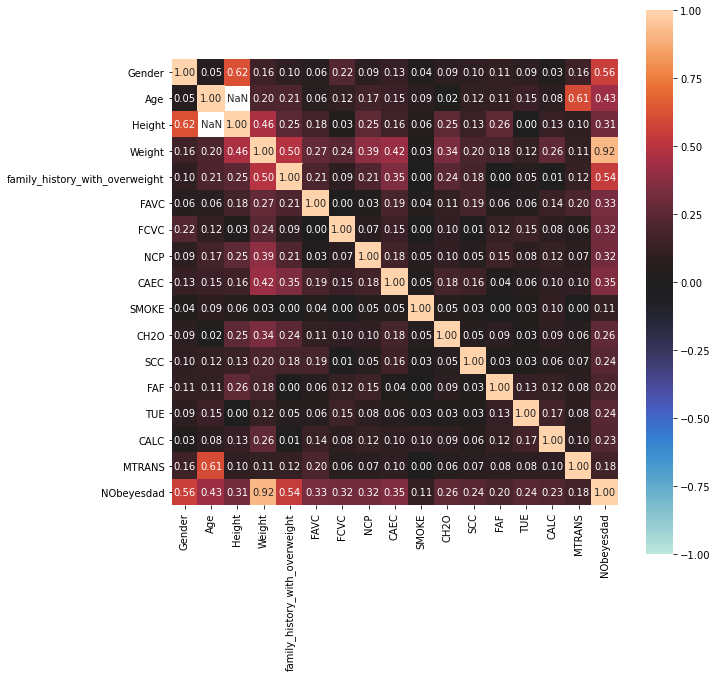

{'corr':                                   Gender       Age    Height    Weight  \
 Gender                          1.000000  0.048682  0.618466  0.161668   
 Age                             0.048682  1.000000  0.000000  0.203452   
 Height                          0.618466  0.000000  1.000000  0.463136   
 Weight                          0.161668  0.203452  0.463136  1.000000   
 family_history_with_overweight  0.098942  0.205494  0.247684  0.496820   
 FAVC                            0.059618  0.063392  0.178364  0.272300   
 FCVC                            0.224434  0.115674  0.034551  0.242006   
 NCP                             0.093150  0.173920  0.250271  0.389871   
 CAEC                            0.130774  0.146357  0.159855  0.419400   
 SMOKE                           0.035201  0.091354  0.055499  0.025746   
 CH2O                            0.089270  0.018975  0.252838  0.340965   
 SCC                             0.097993  0.116028  0.133753  0.201906   
 FAF             

In [22]:
from dython.nominal import associations

associations(obesity, figsize = (10,10))

## Family history

Since family_history_with_overweight has one of the strongest correlation with our target, we'll analyse it. 

- People with Normal weight or Insufficient Weight have a pretty balanced distribution. 
- Some Overweight level 1 have no family history, but about 60% have a family history. 
- For all more severe form of overweight, the genetic compound is really significant. 

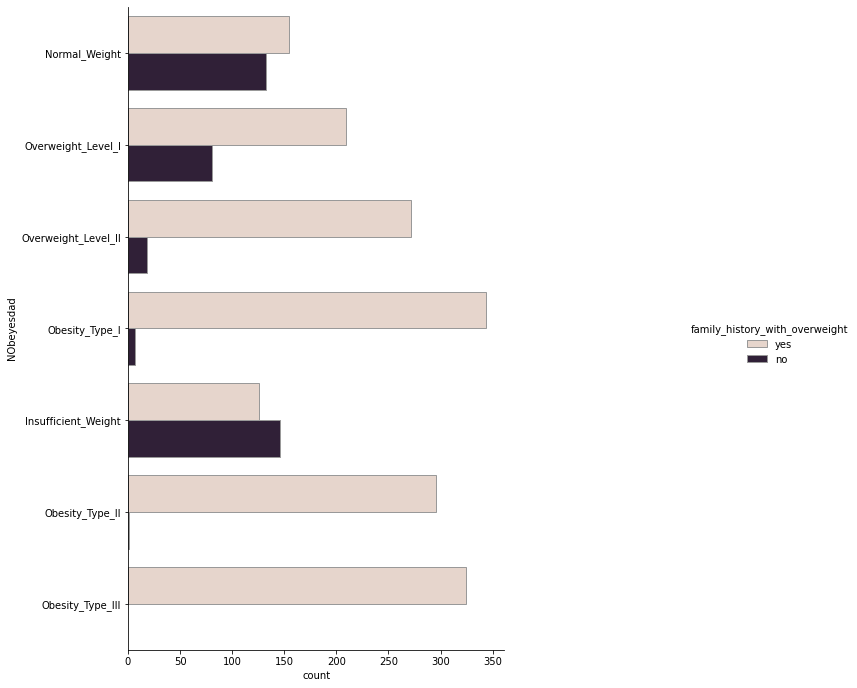

In [23]:
g = sns.catplot(y="NObeyesdad", hue="family_history_with_overweight", kind="count", 
            palette="ch:.1", edgecolor=".6",
            data=obesity)

g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### Mixing features

Now that we saw some information about family history, we can mix it up with other features. For example, FAVC.

In [24]:
CoorNivHist=obesity.pivot_table('Gender',index="NObeyesdad",columns=["family_history_with_overweight","FAVC"],aggfunc='count')
CoorNivHist

family_history_with_overweight    no          yes       
FAVC                              no    yes    no    yes
NObeyesdad                                              
Insufficient_Weight             46.0  100.0   5.0  121.0
Normal_Weight                   36.0   96.0  43.0  112.0
Obesity_Type_I                   1.0    6.0  10.0  334.0
Obesity_Type_II                  1.0    NaN   6.0  290.0
Obesity_Type_III                 NaN    NaN   1.0  323.0
Overweight_Level_I               7.0   74.0  15.0  194.0
Overweight_Level_II              8.0   10.0  66.0  206.0

<AxesSubplot:title={'center':'Relation between familial history and obesity level'}, xlabel='NObeyesdad'>

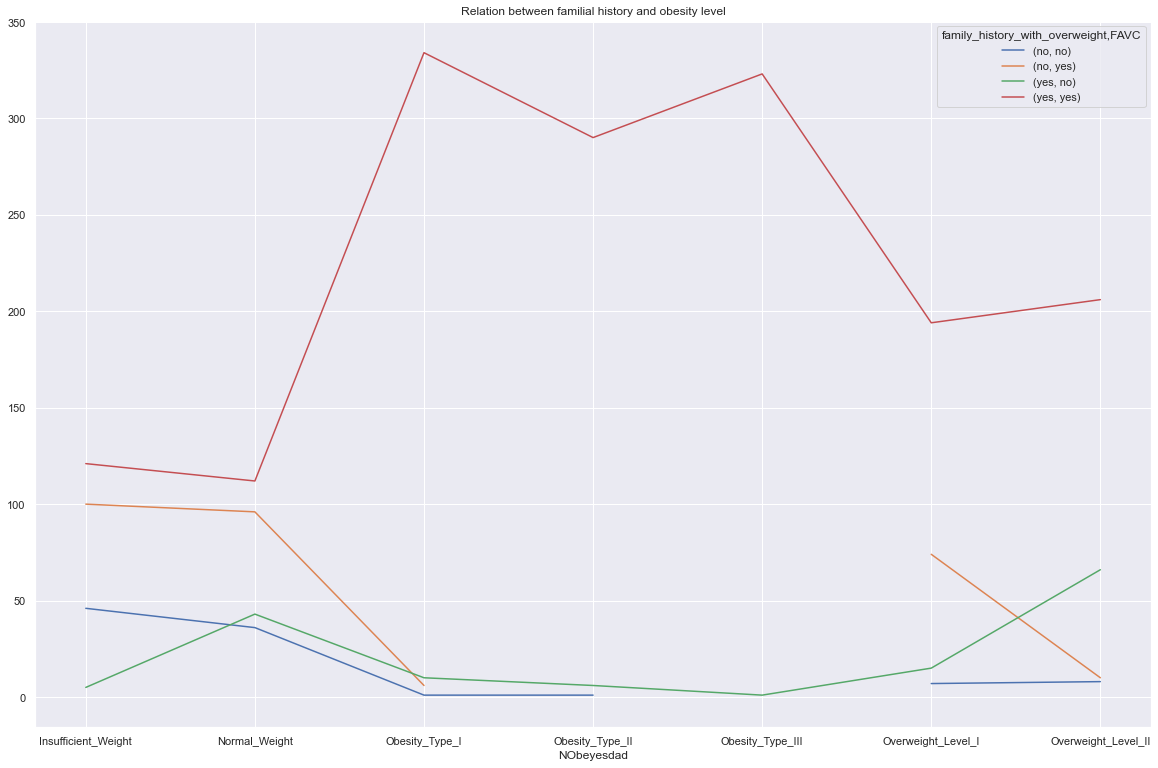

In [25]:
sns.set()
CoorNivHist.plot(figsize=(20,13),title="Relation between familial history and obesity level")

As expected, people **eating high caloric food** and **having history of overweight** in their family *have a lot more obesity issues.*

Individuals **with family history but without the habit to eat high caloric food** are a most in *Normal Weight and more in Overweight Level.*

Individuals **without family history, but without the habit to eat high caloric food** are a lot in *Insufficient Weight and normal weight*. There are still some *Overweight Level 2.* 

Individuals **without any problems in their family and without bad habit to eat  high caloric food** are in majority in *Insufficient weight.*



Overall, 84% of people with overweight problems are people having obesity in their familly. 


In [26]:
(obesity[(obesity.NObeyesdad!="Insufficient_Weight") & (obesity.NObeyesdad !="Normal_Weight") & (obesity.family_history_with_overweight=="yes") ].Gender.count())/obesity[obesity.family_history_with_overweight=="yes"].Gender.count()

0.8371958285052143

## Age

The age is also an important feature. Let's try and see the link between the overweight class and the age. 

In [27]:
def plot_density(df,col):
    plt.figure(figsize=(10,10))
    sns.kdeplot(data=df, x="Age", hue = "NObeyesdad", shade = True, log_scale = True)

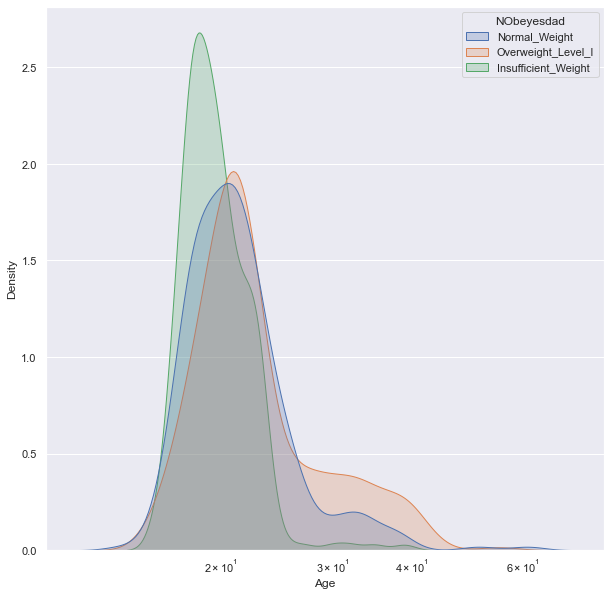

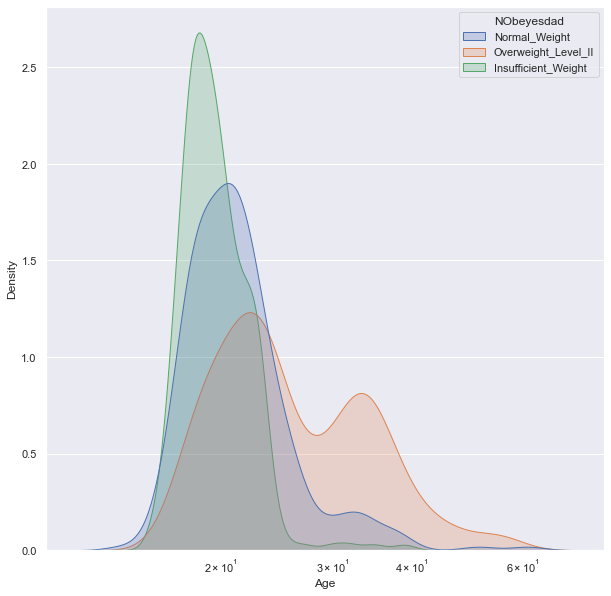

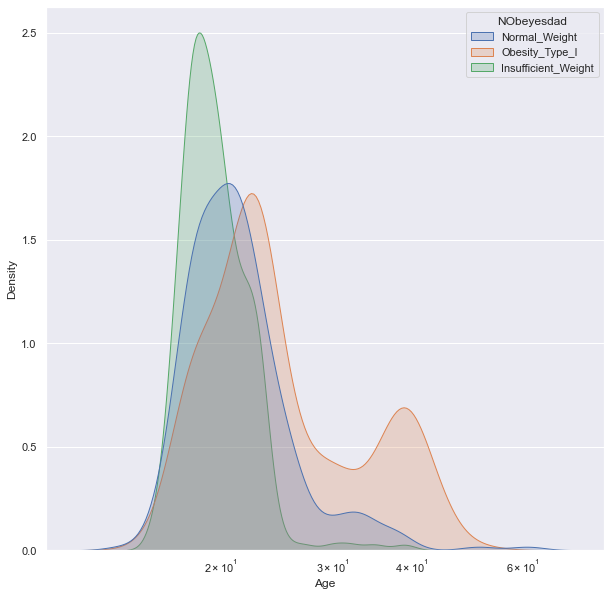

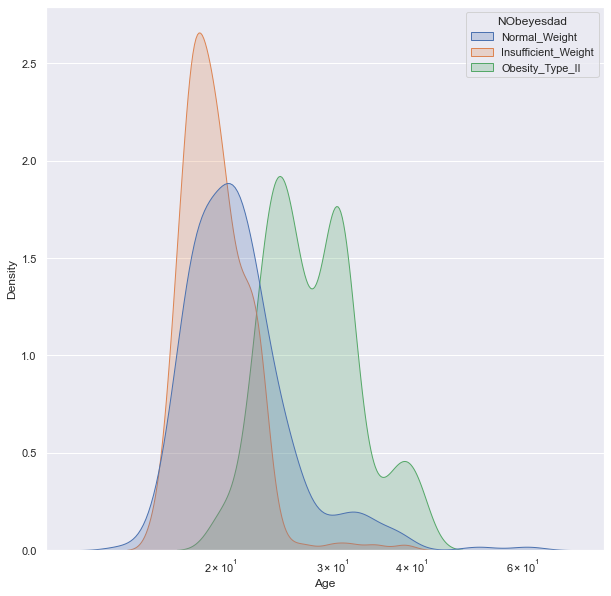

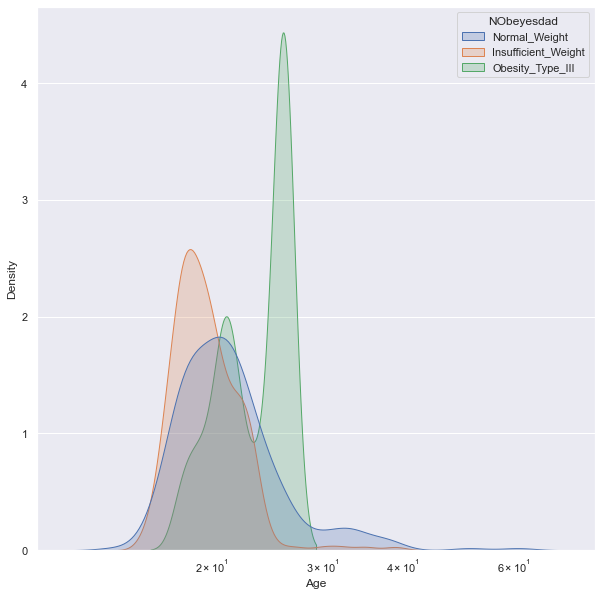

In [28]:
cols = obesity.NObeyesdad.unique().tolist()
for col in cols:
    if(col != 'Normal_Weight' and col != 'Insufficient_Weight'):
        df = obesity[obesity.NObeyesdad.isin(['Normal_Weight','Insufficient_Weight',col])]
        plot_density(df,col)

<AxesSubplot:xlabel='Age', ylabel='Density'>

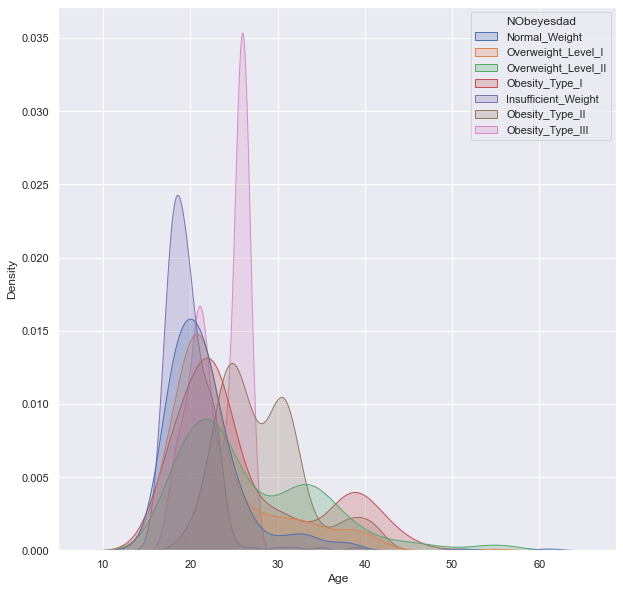

In [29]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=obesity, x="Age", hue = "NObeyesdad", shade = True)

In [30]:
obAge = obesity.groupby('NObeyesdad').describe()
obAge.Age

,count,mean,std,min,25%,50%,75%,max
NObeyesdad,,,,,,,,
Insufficient_Weight,272.0,19.761029,2.680713,16.0,18.0,19.0,21.0,39.0
Normal_Weight,287.0,21.738676,5.096756,14.0,19.0,21.0,23.0,61.0
Obesity_Type_I,351.0,25.903134,7.772976,15.0,21.0,23.0,30.0,52.0
Obesity_Type_II,297.0,28.262626,4.910522,20.0,25.0,27.0,31.0,41.0
Obesity_Type_III,324.0,23.503086,2.794841,18.0,21.0,25.0,26.0,26.0
Overweight_Level_I,290.0,23.431034,6.134344,16.0,20.0,21.0,24.0,55.0
Overweight_Level_II,290.0,26.968966,8.037266,17.0,21.0,24.0,33.0,56.0


### Interpretation of Ages graphs 

With the density graph, we were able to see the distribution of age within each class and see if there was any differences. 

We can conclude some things :

- People with overweight problems tend to be older than others. 
- We can't only use the age to determine if a person has overweight problem because they share a significant range with people of normal or insufficient range (about 14 to 22 years old)

We can note that Obesity Type 2 tends to concern older person. Obesity Type 3 has a lot of person being around 25-26 years old.

## Consumption of food between meal (CAEC)

Based on the computations made earlier, CAEC is a great feature to determine the level of obesity of a person. 

In [31]:
obGroup = obesity.groupby('NObeyesdad').count().Gender
obCAEC = obesity.pivot_table('Gender',index="NObeyesdad",columns=["CAEC"],aggfunc='count')
obCAEC['Total'] = obGroup

obCAEC = obCAEC.fillna(0).astype(dtype = 'int')

In [32]:
import statistics as s

def plotCAECperCat(df,col):
    sns.set_theme(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 5))

    # Since we're in percentage, we plot 100 for all categories
    maxTotal = 100
    df['Total'] = 100
    label = "People {} eating food between meals per overweight categorie. (In %)".format(col)
        # Plot the total of overweight categorie
    sns.set_color_codes("pastel")
    sns.barplot(x='Total', y="NObeyesdad", data=df,
                label="Total", color="b")       

    # Plot the % of people per CAEC per categorie
    sns.set_color_codes("muted")
    bplot = sns.barplot(x='perc', y="NObeyesdad", data=df,
                label="% of {} CAEC".format(col), color="b")
        
    listPercMeanObese = []
    cpt = 0
    for p in bplot.patches:
        width = p.get_width()
        if(width != 100):
            if(cpt > 1):
                listPercMeanObese.append(width)
            space = 7
            if(width/10 > 1):
                space = 10
                if(cpt == 6):
                    space = 15
            plt.text(space+p.get_width(), p.get_y()+0.55*p.get_height(),
                     '{:1.2f}%'.format(width),
                     ha='center', va='center')
            cpt+=1
            
    meanPerc = round(s.mean(listPercMeanObese))
    label += "\n{}% of people with overweight problem are concerned".format(meanPerc)

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, maxTotal), ylabel="",
           xlabel=label)
    sns.despine(left=True, bottom=True)

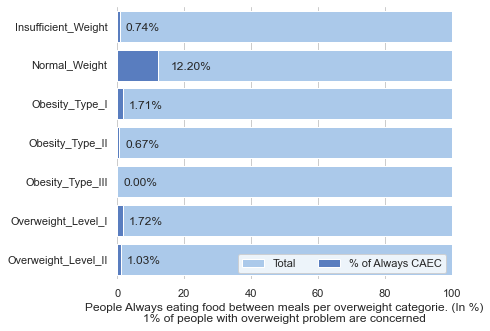

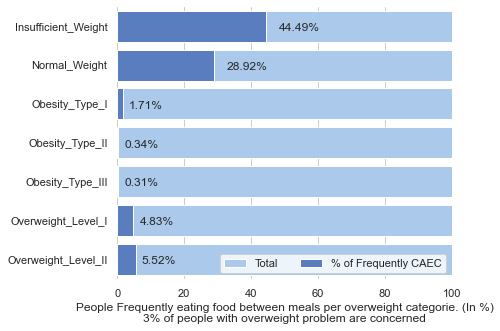

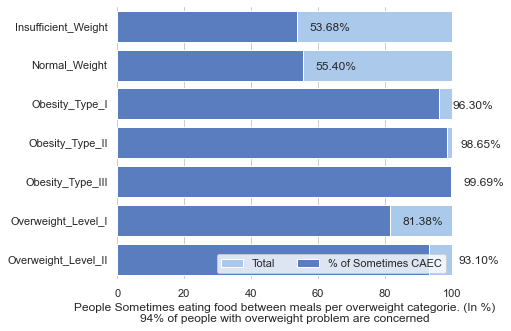

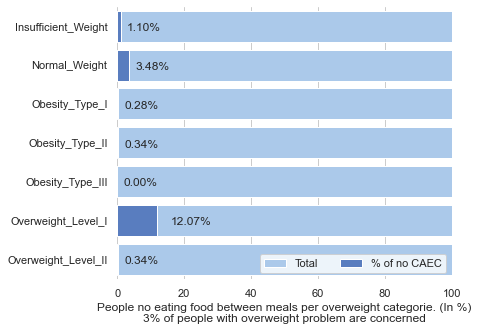

In [33]:
cols = obCAEC.columns.tolist()
cols = cols[:-1]

Total = obCAEC['Total']

for col in cols:
    df = obCAEC[[col,'Total']].reset_index()
    df['perc'] = (df[col]/df['Total'])*100
    plotCAECperCat(df,col)

### Interpretation of CAEC

We can see that most of people are in the Sometimes categorie. 

What's interesting is that the mean individuals having overweight issues is 94%. So it tells us that **someone having overweight problems is very very likely to be sometimes, eating between meals.**

But eating between meals doest not means that the individual is obese. It gives us the information that we can be, but we still need to look at the other attributes.

## Frequent consumption of high caloric food (FAVC)

The last attribute we'll analyze is the frequent consumption of high caloric food. This attribute is also suppose to give great information about the overweight class of an individual. 

Let's analyze it ! 

In [34]:
obFAVC = obesity.pivot_table('Gender',index="NObeyesdad",columns=["FAVC"],aggfunc='count')
obFAVC['Total'] = obGroup # Remember, we used that in 4.5

obFAVC['perc'] = (obFAVC['yes']/obFAVC['Total'])*100

obFAVC = obFAVC.reset_index()
obFAVC

FAVC,NObeyesdad,no,yes,Total,perc
0,Insufficient_Weight,51,221,272,81.250000
1,Normal_Weight,79,208,287,72.473868
2,Obesity_Type_I,11,340,351,96.866097
3,Obesity_Type_II,7,290,297,97.643098
4,Obesity_Type_III,1,323,324,99.691358
5,Overweight_Level_I,22,268,290,92.413793
6,Overweight_Level_II,74,216,290,74.482759


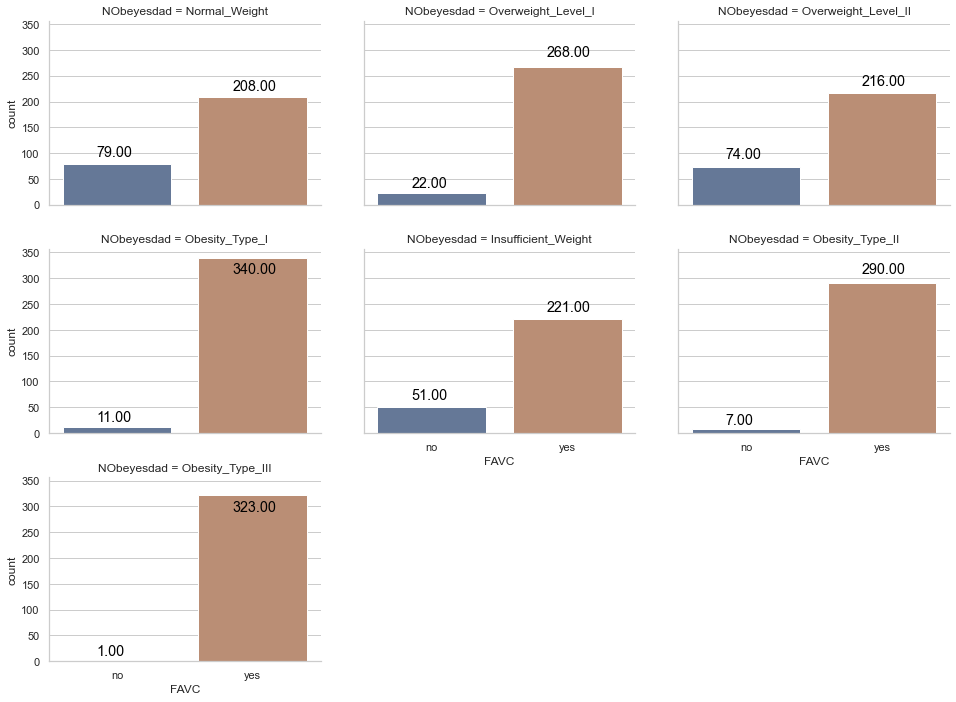

In [35]:
g = sns.catplot(x="FAVC", col='NObeyesdad', kind="count",
                saturation=.5, aspect=.6,
                col_wrap = 3, height=2.5,
                data=obesity)

for i in range(7):
    ax = g.facet_axis(i,i)

    for p in ax.patches:
        minusH = 0
        plusH = 0
        if(p.get_height() > 300):
            minusH = 55
        if(p.get_height() < 100):
            plusH = 10
        ax.text(p.get_x() + 0.25, 
                (p.get_height() * 1.07) - minusH + plusH, 
                '{0:.2f}'.format(p.get_height()), 
                color='black', rotation='horizontal', size='large')

g.fig.set_figwidth(15)
g.fig.set_figheight(10)

### Interpretation of FAVC 

A majority of people eat high caloric food frequently. People suffering from obesity eat hight caloric food (but not all of people eating high caloric food are obese !)

In general, a person who eats high caloric food has overweight problems.

Now that we have a better understanding of our data. We can move on to the next part !

# Data Preparation

We need to prepare our data. Let's retake a quick look at it's structure !

First of all, we'll remove Height and Weight. Since the BMI is computed from these two variables, we remove them. (If not, it's not useful to use Machine Learning)

In [36]:
obesity = obesity.drop(['Height','Weight'],1)
structureData(obesity)

Gender: 2 distinct values -  ['Female' 'Male']
Age: 40 distinct values -  [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 51 52 55 56 61]
family_history_with_overweight: 2 distinct values -  ['no' 'yes']
FAVC: 2 distinct values -  ['no' 'yes']
FCVC: 3 distinct values -  ['1' '2' '3']
NCP: 4 distinct values -  ['1' '2' '3' '4']
CAEC: 4 distinct values -  ['Always' 'Frequently' 'Sometimes' 'no']
SMOKE: 2 distinct values -  ['no' 'yes']
CH2O: 3 distinct values -  ['1' '2' '3']
SCC: 2 distinct values -  ['no' 'yes']
FAF: 3 distinct values -  ['1' '2' '3']
TUE: 2 distinct values -  ['1' '2']
CALC: 4 distinct values -  ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS: 5 distinct values -  ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
NObeyesdad: 7 distinct values -  ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [37]:
obesity.shape

(2111, 15)

We have : 

- 1 qualitative variable (Age)
- 14 categorical variables

Here is the list of the attributes and their meaning : 

- Gender : Male/Female
- Age : Numeric value
- family_history_with_overweight : boolean
- FAVC (Frequent consumption of high caloric food) : boolean
- FCVC (Frequency of consumption of vegetables) : Never | Sometimes | Always
- NCP: Number of main meals: Combien de repas ? : Between 1 and 2 | Three | More than 3
- CAEC: (Consumption of food between meals): No | Sometimes | Frequently | Always
- SMOKE (Do you smoke?) : boolean
- CH2O (Consumption of water daily) : Less than a liter, Between 1 and 2 L, More than 2 L
- SCC (Do you monitor the calories you eat daily?) : boolean
- FAF (Physical activity frequency) : NO | 1-2days | 2-4 days | 4-5 days
- TUE (Time using technology devices) : 0-2 hours | 3-5 hours | more than 5 hours
- CALC (Consumption of alcohol) : No | Sometimes | Frequently | Always
- MTRANS (Transportation used) : Automobile | Motrobike,Bike | Public Transportation | Walking
- NObeyesdad (Obesity Level : **target**) : Insufficient Weight | Normal Weight | Overweight Level I | Overweight Level II | Obesity Type I | Obesity Type II | Obesity Type III)

We'll decide which of the categorical variables are Nominal (does not imply any order. For example, colors : Blue is not superior to Yellow) and wich are Ordinal (implies an order such as : first, second, third). 

We want to keep an order for variables with frequency, levels or steps : 

- CAEC
- CALC

That leaves us Nominals variables : 

- Gender
- FAVC
- family_history_with_overweight
- SMOKE
- SCC
- MTRANS

## Label Encoding

In order to encode ordinal variables, we'll use Label Encoding. 

In [38]:
from sklearn.preprocessing import LabelEncoder

obesityP = obesity
labelEncoder = LabelEncoder()

In [39]:
obesityP['CAEC'] = labelEncoder.fit_transform(obesityP['CAEC'])
obesityP['CALC'] = labelEncoder.fit_transform(obesityP['CALC'])

## One Hot Encoding

Now, we'll use One Hot Encoding for Nominal variables. 

In [40]:
# generate binary values using get_dummies

data = pd.get_dummies(obesityP, columns=["Gender", "FAVC", "family_history_with_overweight", "SMOKE", "SCC", "MTRANS"], prefix=["Gender", "FAVC", "family", "SMOKE", "SCC", "MTRANS"] )
data

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Female,...,family_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2,3,2,2,1,1,3,Normal_Weight,1,...,1,1,0,1,0,0,0,0,1,0
1,21,3,3,2,3,3,1,2,Normal_Weight,1,...,1,0,1,0,1,0,0,0,1,0
2,23,2,3,2,2,2,1,1,Normal_Weight,0,...,1,1,0,1,0,0,0,0,1,0
3,27,3,3,2,2,2,1,1,Overweight_Level_I,0,...,0,1,0,1,0,0,0,0,0,1
4,22,2,1,2,2,1,1,2,Overweight_Level_II,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,3,3,2,2,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2107,22,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2108,23,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2109,24,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0


# Machine Learning

We want to predict a class (NObeyesdad). Therefore, it's a classification problem with multiple classes to predict. 
Our options are :
 
- Linear Discriminant Analysis
- Trees

## Split the data

In order to apply Machine Learning, we need to divise our dataset in two parts : Train et Test. 
We'll train our Model on the Train data and test it on the Test data.

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.drop('NObeyesdad', axis = 1) , data.NObeyesdad, test_size=0.2, random_state=42)

X=data.drop('NObeyesdad', axis = 1) 
y=data.NObeyesdad

In [42]:
X_train.shape,X_test.shape

((1688, 23), (423, 23))

In [43]:
data

,Age,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Female,...,family_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2,3,2,2,1,1,3,Normal_Weight,1,...,1,1,0,1,0,0,0,0,1,0
1,21,3,3,2,3,3,1,2,Normal_Weight,1,...,1,0,1,0,1,0,0,0,1,0
2,23,2,3,2,2,2,1,1,Normal_Weight,0,...,1,1,0,1,0,0,0,0,1,0
3,27,3,3,2,2,2,1,1,Overweight_Level_I,0,...,0,1,0,1,0,0,0,0,0,1
4,22,2,1,2,2,1,1,2,Overweight_Level_II,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,3,3,2,2,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2107,22,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2108,23,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0
2109,24,3,3,2,3,2,1,2,Obesity_Type_III,1,...,1,1,0,1,0,0,0,0,1,0


## Confusion Matrix

In order to see our model performance, we'll use a confusion matrix. 

We used a function made by Dennis T. : https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

Found on : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classes_cf = ['Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          accuracy = None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = accuracy

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Models

Now we're all setup, let's create our models !

We create a dictionnary to store all accuracies and model's name. We'll use later to compare the models.

In [48]:
dictAcc = dict()
dictStatModel = dict()

In [49]:
def predictionsModel(model,name):
    
    predictionTest = model.predict(X_test)
    print("accuracy test: {}%".format(round(accuracy_score(y_test, predictionTest)*100,2)))

    predictionTrain = model.predict(X_train)
    print("accuracy train: {}%".format(round(accuracy_score(y_train, predictionTrain)*100,2)))

    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)

    print(scores)

    dictAcc[name] = round(accuracy_score(y_test, predictionTest)*100,2)
    
    return y_test, predictionTest

### LDA

Let's start with the LDA model

In [50]:
from numpy import mean
from numpy import std

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# define model

model = LDA()

# define model eveluation method 

model.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'LDA')

accuracy test: 57.68%
accuracy train: 57.52%
[0.43026005 0.57345972 0.55450237 0.56398104 0.61137441]


#### LDA Confusion Matrix

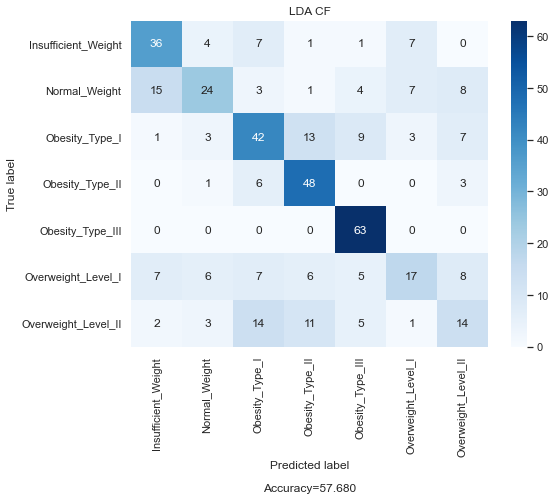

In [51]:
cf_matrix = confusion_matrix(y_test, predictionTest)
make_confusion_matrix(cf_matrix, figsize=(8,6), categories = classes_cf, cbar=True, title = "LDA CF", percent = False, sum_stats = True, accuracy = dictAcc['LDA'])

#### LDA Classification Report

In [52]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

                     precision    recall  f1-score   support

Insufficient_Weight       0.59      0.64      0.62        56
      Normal_Weight       0.59      0.39      0.47        62
     Obesity_Type_I       0.53      0.54      0.54        78
    Obesity_Type_II       0.60      0.83      0.70        58
   Obesity_Type_III       0.72      1.00      0.84        63
 Overweight_Level_I       0.49      0.30      0.37        56
Overweight_Level_II       0.35      0.28      0.31        50

           accuracy                           0.58       423
          macro avg       0.55      0.57      0.55       423
       weighted avg       0.56      0.58      0.56       423



In [53]:
df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['LDA'] = df.describe().T['mean'].tolist()[:3]

#### LDA Overview

The LDA model has an accuracy of about 57%, which is close to randomness. 

Here is how to interpret the classification report : 

- The **recall** means "how many of this class you find over the whole number of element of this class"

- The **precision** will be "how many are correctly classified among that class"

- The **f1-score** is the harmonic mean between precision & recall

- The **support** is the number of occurence of the given class in your dataset

So, the model is only good at predict Obesity_Type_III

### Classification Tree

Now, let's use a basic classification tree.

In [54]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=50)
model.fit(X_train, y_train)
  
y_test, predictionTest = predictionsModel(model,'CT')

accuracy test: 77.54%
accuracy train: 96.8%
[0.56737589 0.78909953 0.79620853 0.82227488 0.82701422]


#### Classification Tree CF

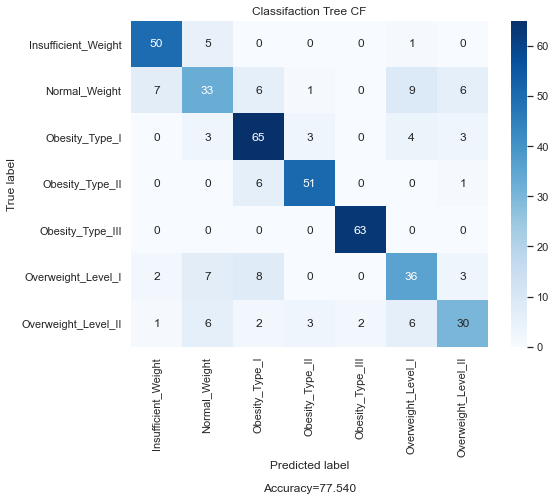

In [55]:
cf_matrix = confusion_matrix(y_test, predictionTest)
make_confusion_matrix(cf_matrix, figsize=(8,6), categories = classes_cf, cbar=True, title = "Classifaction Tree CF", percent = False, sum_stats = True, accuracy = dictAcc['CT'])

#### Classification Tree CR

In [56]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['CT'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.89      0.86        56
      Normal_Weight       0.61      0.53      0.57        62
     Obesity_Type_I       0.75      0.83      0.79        78
    Obesity_Type_II       0.88      0.88      0.88        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.64      0.64      0.64        56
Overweight_Level_II       0.70      0.60      0.65        50

           accuracy                           0.78       423
          macro avg       0.77      0.77      0.77       423
       weighted avg       0.77      0.78      0.77       423



The accuracy is way better and not random. 

The model lacks of precision for Normal_Weight and Overweight_Level_I.

#### CT Tuned parameters

Let's try to modify parameters. 

We see that with a min_samples_split of 5, we got a better Mean Accuracy an Accuracy Train smaller ! 

In [57]:
model = tree.DecisionTreeClassifier(random_state=50, min_samples_split = 5)
model.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'CT_Tuned')

accuracy test: 73.52%
accuracy train: 91.94%
[0.56264775 0.77488152 0.79383886 0.81753555 0.80805687]


In [58]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['CT_Tuned'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.84      0.79        56
      Normal_Weight       0.48      0.47      0.48        62
     Obesity_Type_I       0.74      0.79      0.77        78
    Obesity_Type_II       0.82      0.86      0.84        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.65      0.61      0.63        56
Overweight_Level_II       0.68      0.52      0.59        50

           accuracy                           0.74       423
          macro avg       0.73      0.73      0.73       423
       weighted avg       0.73      0.74      0.73       423



#### CT GridSearch_CV

We'll use a gridsearch with cross validation.

Here, we can see that the grid search chose a *maxDepth = 30 and min_samples_split = 5 as optimal parameters*.

In [59]:
from sklearn.model_selection import GridSearchCV

tree_param = {'max_depth': [20,30], 'min_samples_split': [5,6,7]}

clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, cv=5)
clf.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'CT_RS')
print(clf.best_estimator_)

accuracy test: 73.52%
accuracy train: 91.94%
[0.56264775 0.77488152 0.79383886 0.81753555 0.80805687]
DecisionTreeClassifier(max_depth=20, min_samples_split=5)


In [60]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['CT_GS'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.84      0.79        56
      Normal_Weight       0.48      0.47      0.48        62
     Obesity_Type_I       0.74      0.79      0.77        78
    Obesity_Type_II       0.82      0.86      0.84        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.65      0.61      0.63        56
Overweight_Level_II       0.68      0.52      0.59        50

           accuracy                           0.74       423
          macro avg       0.73      0.73      0.73       423
       weighted avg       0.73      0.74      0.73       423



### Bagging

The Bagging seems to be the best model so far ! 

In [61]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=50)
model.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'Bagging')

accuracy test: 78.01%
accuracy train: 95.56%
[0.58156028 0.8056872  0.78909953 0.82701422 0.85545024]


#### Bagging CF

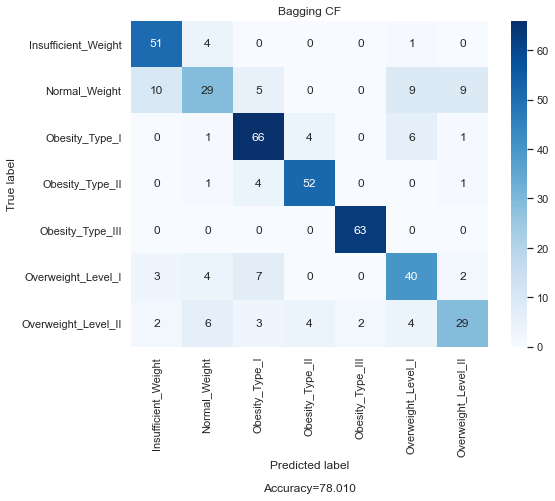

In [62]:
cf_matrix = confusion_matrix(y_test, predictionTest)
make_confusion_matrix(cf_matrix, figsize=(8,6), categories = classes_cf, cbar=True, title = "Bagging CF", percent = False, sum_stats = True, accuracy = dictAcc['Bagging'])

#### Bagging CR

In [63]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['Bagging'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.91      0.84        56
      Normal_Weight       0.64      0.47      0.54        62
     Obesity_Type_I       0.78      0.85      0.81        78
    Obesity_Type_II       0.87      0.90      0.88        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.67      0.71      0.69        56
Overweight_Level_II       0.69      0.58      0.63        50

           accuracy                           0.78       423
          macro avg       0.77      0.77      0.77       423
       weighted avg       0.77      0.78      0.77       423



### Random Forest

The Random Forest is better than the Bagging on this DataFrame !

In [76]:
from sklearn.ensemble import RandomForestClassifier

RFmodel = RandomForestClassifier(random_state=50)
RFmodel.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(RFmodel,'RF')

accuracy test: 82.51%
accuracy train: 96.8%
[0.55082742 0.82701422 0.84123223 0.85308057 0.86492891]


#### RF CF

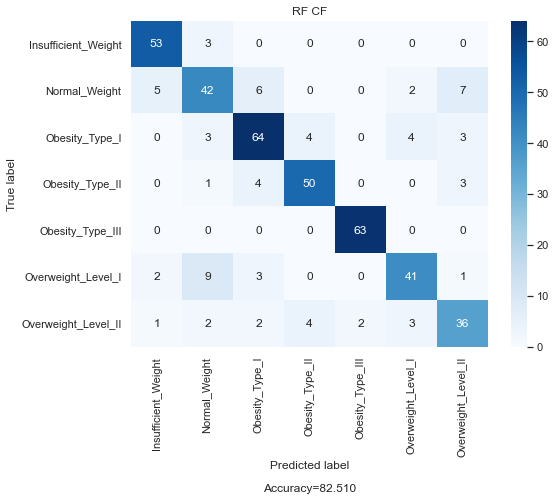

In [77]:
cf_matrix = confusion_matrix(y_test, predictionTest)
make_confusion_matrix(cf_matrix, figsize=(8,6), categories = classes_cf, cbar=True, title = "RF CF", percent = False, sum_stats = True, accuracy = dictAcc['RF'])

#### RF CR

In [78]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['RF'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.95      0.91        56
      Normal_Weight       0.70      0.68      0.69        62
     Obesity_Type_I       0.81      0.82      0.82        78
    Obesity_Type_II       0.86      0.86      0.86        58
   Obesity_Type_III       0.97      1.00      0.98        63
 Overweight_Level_I       0.82      0.73      0.77        56
Overweight_Level_II       0.72      0.72      0.72        50

           accuracy                           0.83       423
          macro avg       0.82      0.82      0.82       423
       weighted avg       0.82      0.83      0.82       423



### Boosting

Boosting is known to be the best model ! Let's try to change its parameters and see if we obtain better results. 

In [68]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(random_state=50)
model.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'Boosting')

accuracy test: 82.27%
accuracy train: 96.8%
[0.57210402 0.81753555 0.82938389 0.86966825 0.86729858]


#### Boosting CF

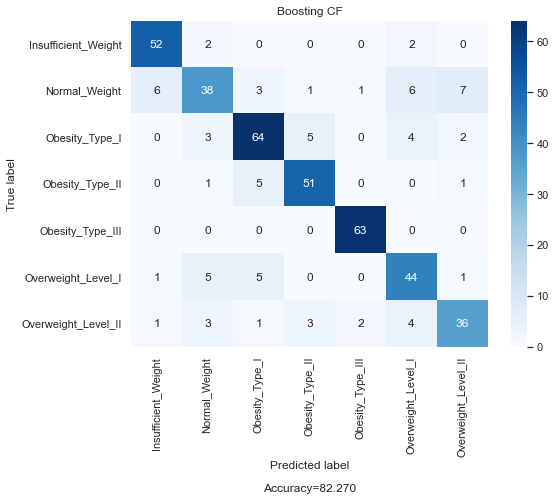

In [69]:
cf_matrix = confusion_matrix(y_test, predictionTest)
make_confusion_matrix(cf_matrix, figsize=(8,6), categories = classes_cf, cbar=True, title = "Boosting CF", percent = False, sum_stats = True, accuracy = dictAcc['Boosting'])

#### Boosting CR

In [70]:
print(classification_report(y_test, predictionTest, target_names=classes_cf))
classReport = classification_report(y_test, predictionTest, target_names=classes_cf, output_dict=True)

df = pd.DataFrame.from_dict(classReport, orient = 'columns').T
dictStatModel['Boosting'] = df.describe().T['mean'].tolist()[:3]

                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.93      0.90        56
      Normal_Weight       0.73      0.61      0.67        62
     Obesity_Type_I       0.82      0.82      0.82        78
    Obesity_Type_II       0.85      0.88      0.86        58
   Obesity_Type_III       0.95      1.00      0.98        63
 Overweight_Level_I       0.73      0.79      0.76        56
Overweight_Level_II       0.77      0.72      0.74        50

           accuracy                           0.82       423
          macro avg       0.82      0.82      0.82       423
       weighted avg       0.82      0.82      0.82       423



#### Boosting Tuned Parameters

The few tries weren't successful, let's move on to the GridSearch. 

In [71]:
model = HistGradientBoostingClassifier(random_state=50, max_depth = 15)
model.fit(X_train, y_train)

y_test, predictionTest = predictionsModel(model,'Boosting')

accuracy test: 81.56%
accuracy train: 96.8%
[0.55555556 0.80805687 0.83175355 0.86729858 0.86255924]


#### Boosting GridSearchCV

Unfortunately, the GS doest not end, so we won't run it.

In [72]:
# parameters = {
#  'max_iter': [1000,1200,1500],
#  'learning_rate': [0.1],
#  'max_depth' : [25, 50, 75],
#  'random_state' : [50],
#  }

# model = GridSearchCV(HistGradientBoostingClassifier(), parameters, cv=5)
# model.fit(X_train, y_train)

# y_test, predictionTest = predictionsModel(model,'BoostingGS')
# print(model.best_estimator_)

### Model Selection

We gathered the means of precision, recall and F1-score of all the models.
Let's plot them and see which model is best.

Since we know LDA is really bad, we'll remove it from our dictionnary.

In [73]:
del dictStatModel['LDA']
dictStatModel

{'CT': [0.7694878262459708, 0.7700102884186516, 0.768460918823842],
 'CT_Tuned': [0.7287310731827062, 0.7288862049492807, 0.7266811868570752],
 'CT_GS': [0.7287310731827062, 0.7288862049492807, 0.7266811868570752],
 'Bagging': [0.7709348959816806, 0.7749366551686862, 0.7694321227449539],
 'RF': [0.8220038306389181, 0.8231343996955636, 0.8219813282486423],
 'Boosting': [0.8181362302503091, 0.8213403905702069, 0.8186307607211759]}

In [74]:
df = pd.DataFrame.from_dict(dictStatModel, columns = ['Precision','Recall','F1-Score'], orient = 'index')
df = df.T

<AxesSubplot:>

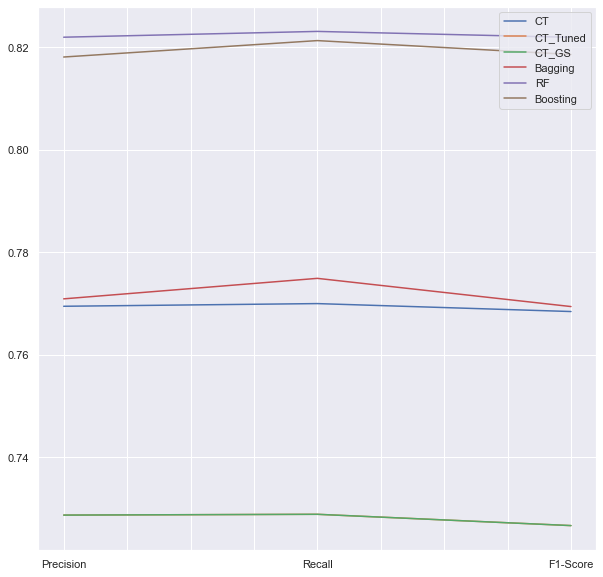

In [75]:
sns.set()
df.plot(figsize = (10,10))

We clearly see that Boosting et Random Forest are the two best models. 

Since Random Forest is better and **way faster**, we'll chose it for our final model !

#### Model exportation

In order to export the chosen model, we use Pickle !

In [79]:
import pickle
pickle.dump(RFmodel, open('RF_model', 'wb'))